# Part II - (Prosper Loan Data Analysis)
## by (Lerato Maluleke)

## Investigation Overview


> The investigations will look at variables which answer the question with visualisations:
- That factors affect a loan's outcome status? Will beblooking into those factors.

## Dataset Overview

>The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio.

In [1]:
# import all packages and set plots to be embedded inline
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
import seaborn as sns

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')



# Base color for graphs 

base_color = sb.color_palette()[0]

In [2]:
# load in the dataset into a pandas dataframe
ploan = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe
cols = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)']
loan_subset = ploan[cols]

# group all values in "LoanStatus" containing "Past Due " and replace with "Past Due"
loan_subset.loc[loan_subset['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'
loan_subset[loan_subset['LoanStatus']=="Past Due"]

# set dtype of 'LoanStatus' to category
loanstatus_order = loan_subset['LoanStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
loan_subset['LoanStatus'] = loan_subset['LoanStatus'].astype(ordered_var)

# set dtype of 'EmploymentStatus' to category
employ_order = loan_subset['EmploymentStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = employ_order)
loan_subset['EmploymentStatus'] = loan_subset['EmploymentStatus'].astype(ordered_var)

# set dtype of 'Term' to category
term_order = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
loan_subset['Term'] = loan_subset['Term'].astype(ordered_var)

# set dtype of 'rating' to category
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loan_subset['ProsperRating (Alpha)'] = loan_subset['ProsperRating (Alpha)'].astype(ordered_var)

loan_subset.shape

(113937, 9)

### How does the loan term affect the loans outcome? 

<AxesSubplot:xlabel='Term', ylabel='count'>

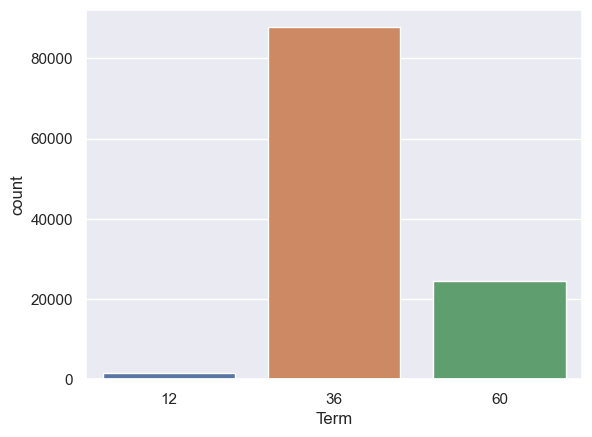

In [3]:
sb.set()
sb.countplot(data=loan_subset, x='Term')

Loan Term: The length of time a borrower has to repay a loan affects the outcome of the loan. Longer loan terms may provide more flexibility for the borrower, but may also increase their risk of defaulting.This will be compared to another factor in bivariate so we can come to a conclusion on how it affects repayment etc

Is there any relationship between Emploment status and PropserRating ?

In [ ]:
# create clustered bar plot
sns.countplot(data=ploan, x='EmploymentStatus', hue='ProsperRating (Alpha)')

# add axis labels
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Rating by Employment')

# rotate x-axis labels
plt.xticks(rotation=90)

# show plot
plt.show()


The resulting plot shows the distribution of ProsperRating for each value of EmploymentStatus. We can see that for most EmploymentStatus categories, the majority of loans have a ProsperRating of C or D. However, there are some differences between categories: for example, self-employed borrowers are more likely to have a ProsperRating of HR (high-risk) than borrowers who are employed or retired.

In [ ]:
# reset the index if the column names are not in the index
ploan = ploan.reset_index()

# select the required columns
selected_cols = ['ProsperRating (Alpha)', 'DebtToIncomeRatio','EmploymentStatus','Term']
ploan = ploan[selected_cols]

import seaborn as sns

# Create a pair grid with multiple variables
g = sns.PairGrid(ploan, vars=["DebtToIncomeRatio", "ProsperRating (Alpha)","Term"])

# Map scatter plot to upper triangle
g.map_upper(sns.scatterplot)

# Map histogram plot to diagonal
g.map_diag(sns.histplot)

# Map kernel density plot to lower triangle
g.map_lower(sns.violinplot)

# Add legend
g.add_legend()

# Show plot
plt.show()

This graph shows a PairGrid plot with multiple variables from the Prosper loan dataset. The variables used in this plot are DebtToIncomeRatio, ProsperRating (Alpha), and Term. The upper triangle of the grid contains scatterplots showing the relationship between the variables, while the diagonal contains histograms showing the distribution of each variable. The lower triangle contains violin plots, which are similar to box plots but show the distribution of data in a more detailed way.

From the scatterplots, we can see that DebtToIncomeRatio and ProsperRating (Alpha) are weakly negatively correlated, meaning that as the debt-to-income ratio increases, the Prosper rating tends to decrease slightly. The scatterplot of ProsperRating (Alpha) and Term shows that longer-term oans tend to have higher ratings, while shorter-term loans tend to have lower ratings.

The histograms show that DebtToIncomeRatio is slightly skewed to the right, indicating that most borrowers have a relatively low debt-to-income ratio. ProsperRating (Alpha) is roughly normally distributed, with a peak in the B rating category. The histogram for Term shows that the most common loan term is 36 months.

The violin plots in the lower triangle show the distribution of each variable. The DebtToIncomeRatio plot is skewed to the right, with a few borrowers having very high ratios. The ProsperRating (Alpha) plot shows that the distribution is wider in the lower rating categories, indicating that there is more variability in borrower characteristics among those with lower ratings. Finally, the Term plot shows that the 36-month term is the most common, with a few borrowers taking out loans for longer or shorter terms. 

In [ ]:
!jupyter nbconvert Part_II_slide.ipynb --to slides --post serve --no-input --no-prompt

In [ ]:
Thank you for your time. 